In [1]:
%%capture
%pip install nfl_data_py --upgrade
# lets take a look at just how good aj brown and devonta smith were in the first 3 quarters of games of the regular season

In [2]:
import nfl_data_py as nfl
import numpy as np
import pandas as pd

In [3]:
pbp_df = nfl.import_pbp_data([2022])

2022 done.
Downcasting floats.


In [4]:
nfl.see_pbp_cols()

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'out_of_bounds', 'home_opening_kickoff', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd',
       'xpass', 'pass_oe'],
      dtype='object', length=372)

In [5]:
print(pbp_df.columns.tolist())


['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team', 'season_type', 'week', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble', 'pass_length', 'pass_location', 'air_yards', 'yards_after_catch', 'run_location', 'run_gap', 'field_goal_result', 'kick_distance', 'extra_point_result', 'two_point_conv_result', 'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team', 'td_player_name', 'td_player_id', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'score_differential', 'posteam_score_post', 'defteam_score_post', 'score_differential

In [6]:
pd.options.display.max_columns = None

cols = ['play_id',
 'week',
 'posteam',
 'qtr',
 'play_type',
 'yards_gained',
 'incomplete_pass',
 'interception',
 'penalty',
 'two_point_attempt',
 'complete_pass',
 'passer_player_id',
 'passer_player_name',
 'passing_yards',
 'receiver_player_id',
 'receiver_player_name',
 'receiving_yards',
 'penalty_team',
 'replay_or_challenge',
 'replay_or_challenge_result',
 'result',
 'total',
 'aborted_play',
 'success',
 'passer',
 'receiver',
 'pass',
 'play',
 'passer_id',
 'receiver_id',
 'name',
 'id',
 'fantasy_player_name',
 'fantasy_player_id',
 'fantasy',
 'fantasy_id',
 'out_of_bounds']

pbp_df_filtered = pbp_df[cols]
pbp_df_filtered = pbp_df_filtered.loc[(pbp_df_filtered['play_type'] == 'pass') & (pbp_df_filtered['complete_pass'] == 1) & (pbp_df_filtered['week'] < 19) & (pbp_df_filtered['qtr'] < 3.9) ]
weekly_df_yards = pbp_df_filtered.groupby(['receiver_player_name', 'week'], as_index=False)['receiver_player_name','yards_gained'].sum()


weekly_df_yards['cumulative_yards'] = weekly_df_yards.groupby('receiver_player_name')['yards_gained'].cumsum()

sorted_weekly_df_yards = weekly_df_yards.sort_values('cumulative_yards', ascending=False)
sorted_weekly_df_yards.head()

<ipython-input-6-8a1ab3aa085c>:43: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_df_yards = pbp_df_filtered.groupby(['receiver_player_name', 'week'], as_index=False)['receiver_player_name','yards_gained'].sum()
<ipython-input-6-8a1ab3aa085c>:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_df_yards = pbp_df_filtered.groupby(['receiver_player_name', 'week'], as_index=False)['receiver_player_name','yards_gained'].sum()


,receiver_player_name,week,yards_gained,cumulative_yards
3150,T.Hill,18,23.0,1298.0
1669,J.Jefferson,18,38.0,1292.0
3149,T.Hill,17,34.0,1275.0
1668,J.Jefferson,17,15.0,1254.0
32,A.Brown,18,95.0,1241.0


In [7]:
week_18_cumulative_yards = sorted_weekly_df_yards[sorted_weekly_df_yards['week'] == 18].groupby('receiver_player_name')['cumulative_yards'].max()

# Filter the players based on week 18 cumulative yards being greater than or equal to 1000
players_to_keep = week_18_cumulative_yards[week_18_cumulative_yards >= 1000].index

# Filter the DataFrame to keep only the players with week 18 cumulative yards >= 1000
filtered_df = sorted_weekly_df_yards[sorted_weekly_df_yards['receiver_player_name'].isin(players_to_keep)]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
grouped = filtered_df.groupby('receiver_player_name', as_index=False)

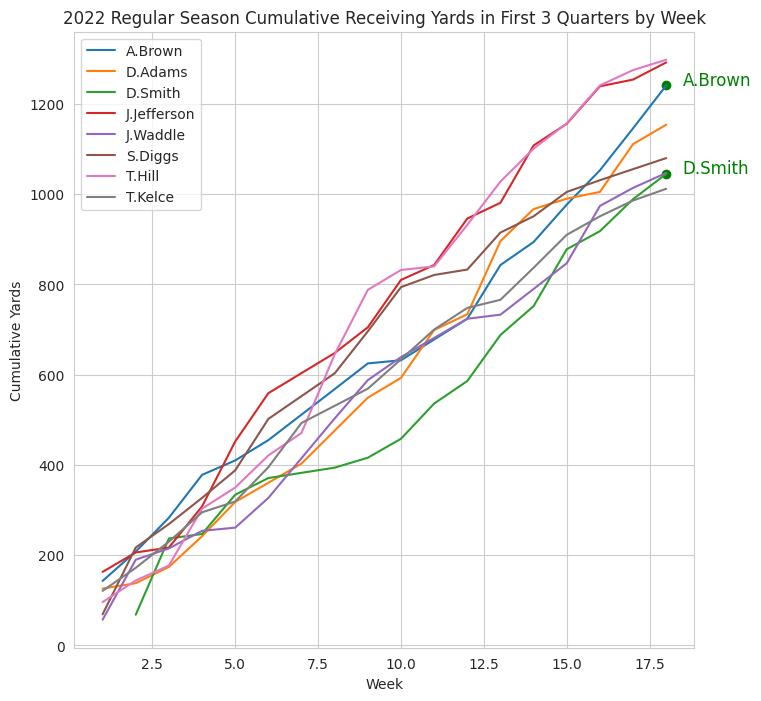

In [11]:
fig, ax = plt.subplots(figsize=(8,8))

for player, group in grouped:
    plt.plot(group['week'], group['cumulative_yards'], label=player)

notable_players = [
    'D.Smith', 'A.Brown'
]

for player_name in notable_players:
  player = filtered_df.loc[(filtered_df['receiver_player_name'] == player_name) & (filtered_df['week'] == 18)]
  if not player.empty:
    yards = player['cumulative_yards']
    ax.annotate(player_name, xy=[18+.5,yards], color='green', fontsize='12')
    ax.scatter(18, yards, color='green')

# Set plot labels and legend
plt.xlabel('Week')
plt.ylabel('Cumulative Yards')
plt.title('2022 Regular Season Cumulative Receiving Yards in First 3 Quarters by Week')
plt.legend()

# Show the plot
plt.show()